In [1]:
import math
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
DEBUG = False

In [2]:
cv2.__version__

'3.4.2'

In [ ]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [33]:
im = cv2.imread("1.cropped/john0002.jpg")
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray.shape

(3300, 2200)

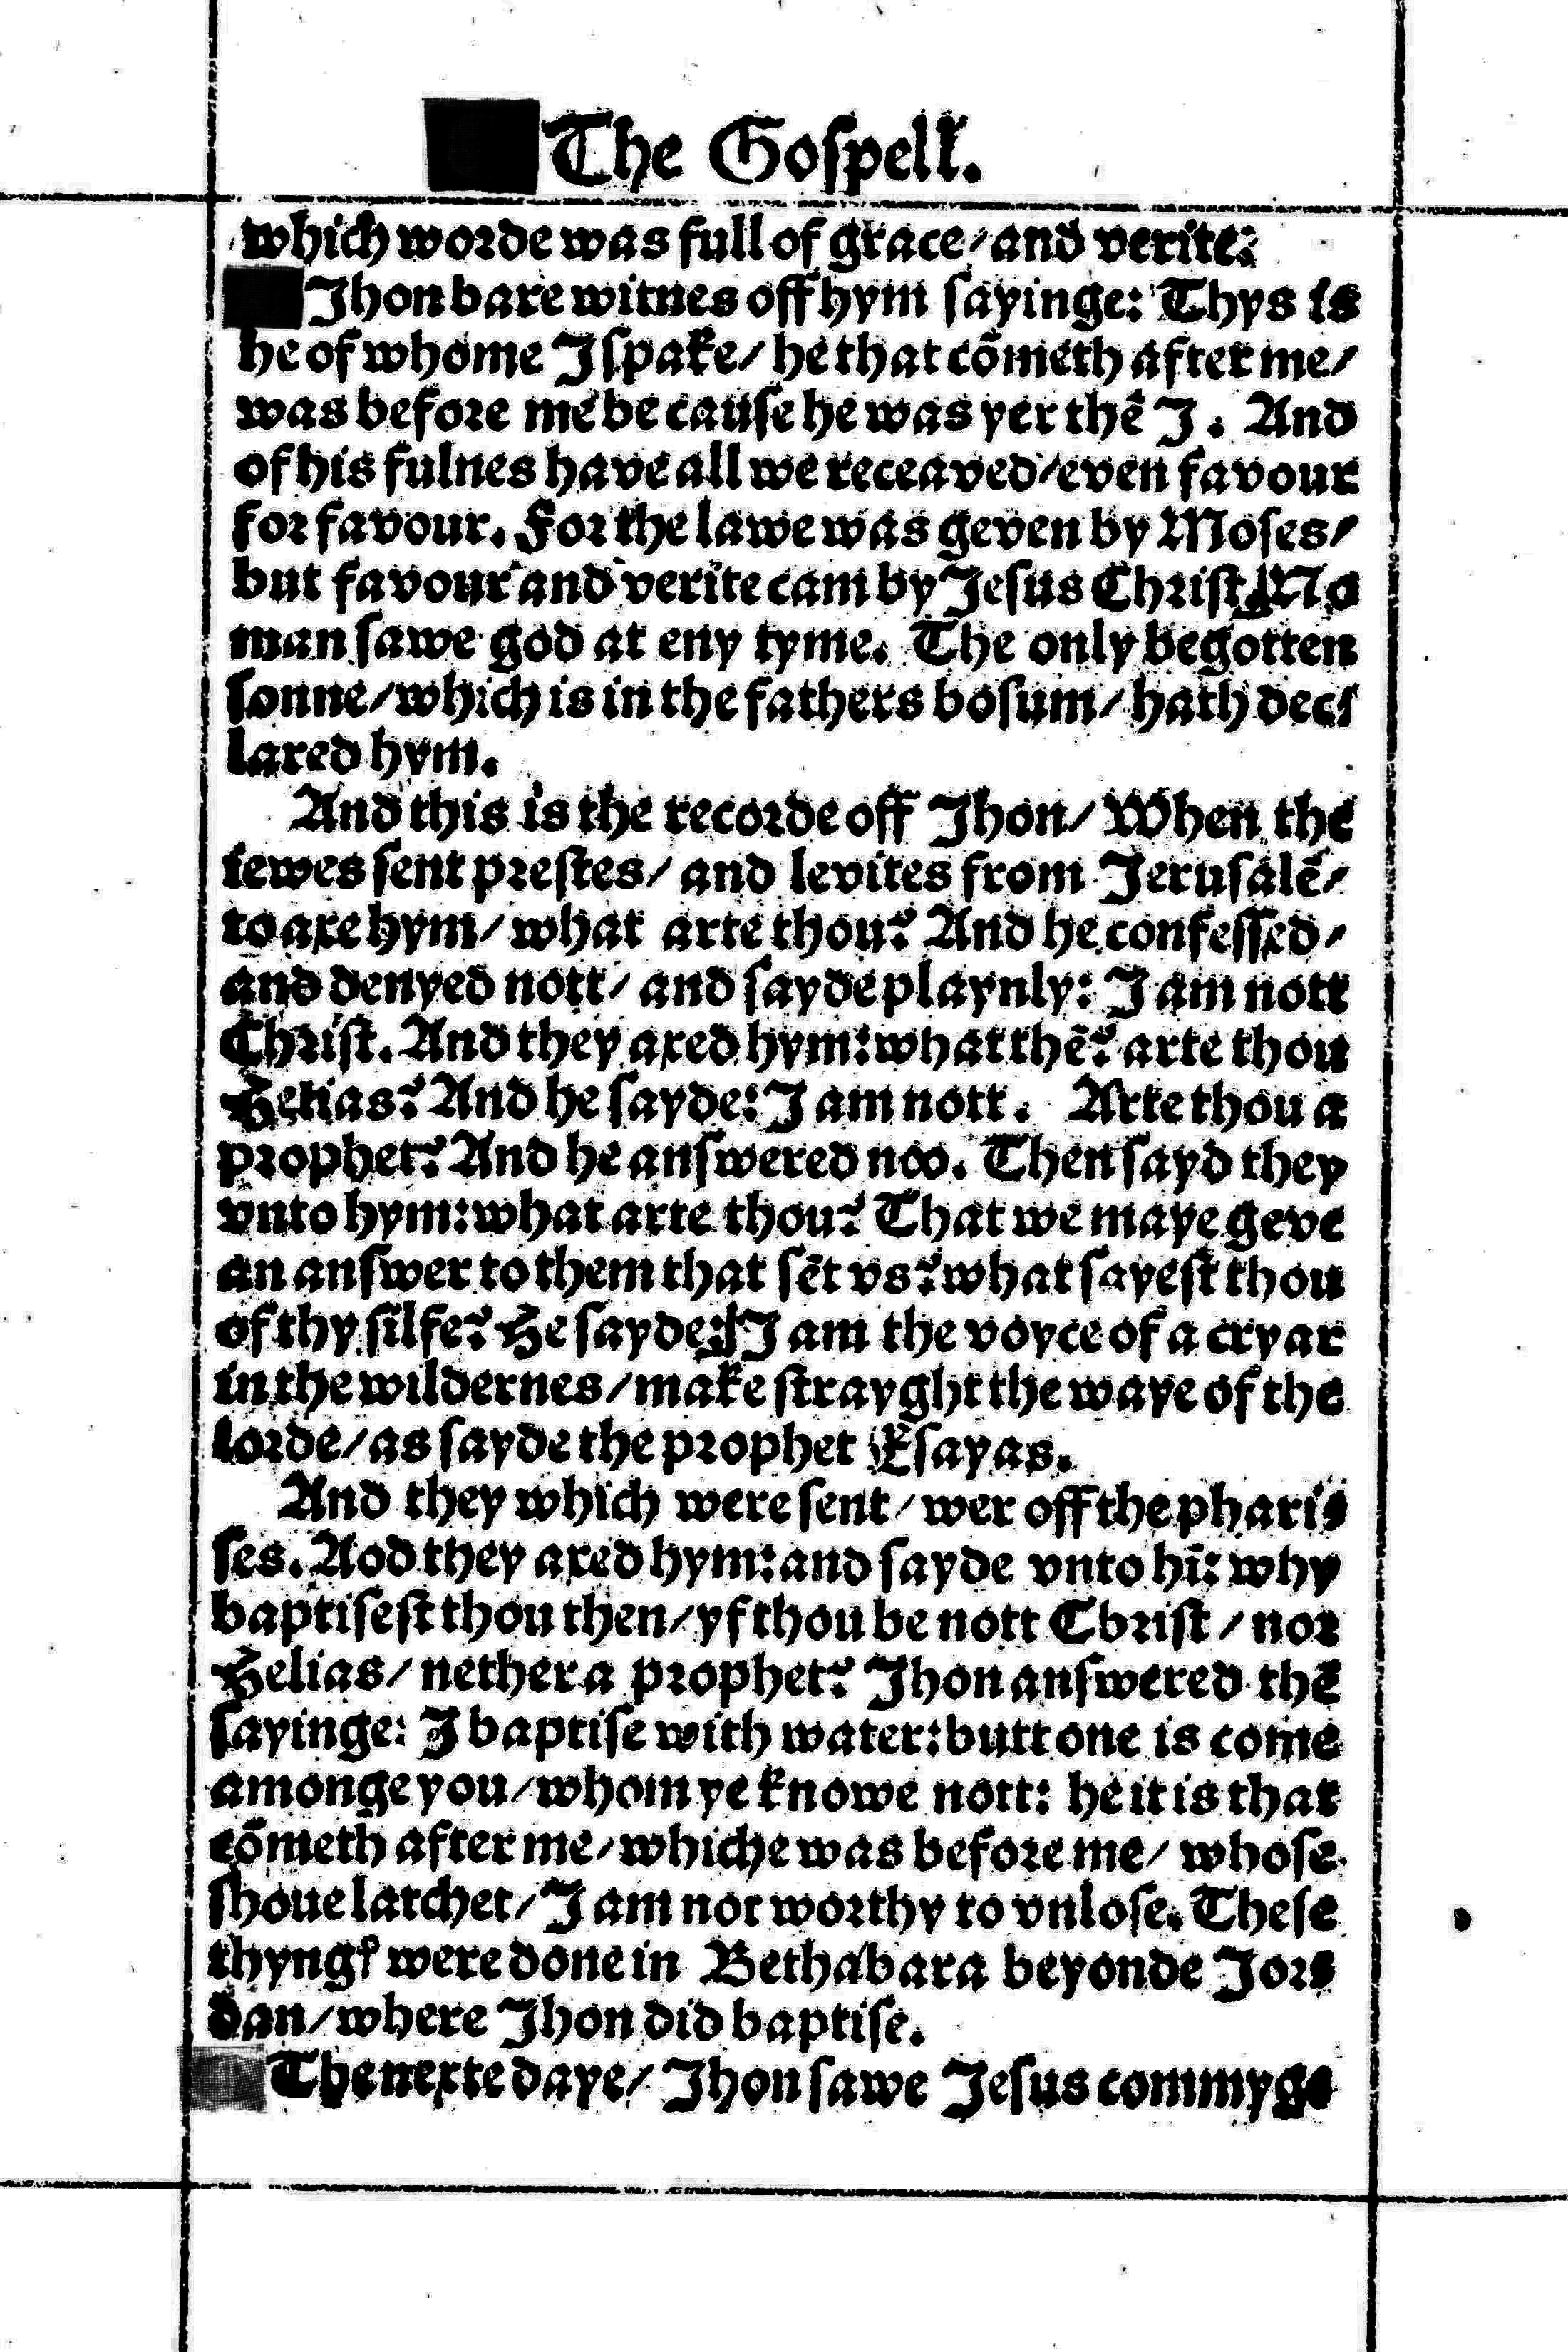

In [34]:
adj = adjust_gamma(gray, gamma=0.1)
Image.fromarray(adj)

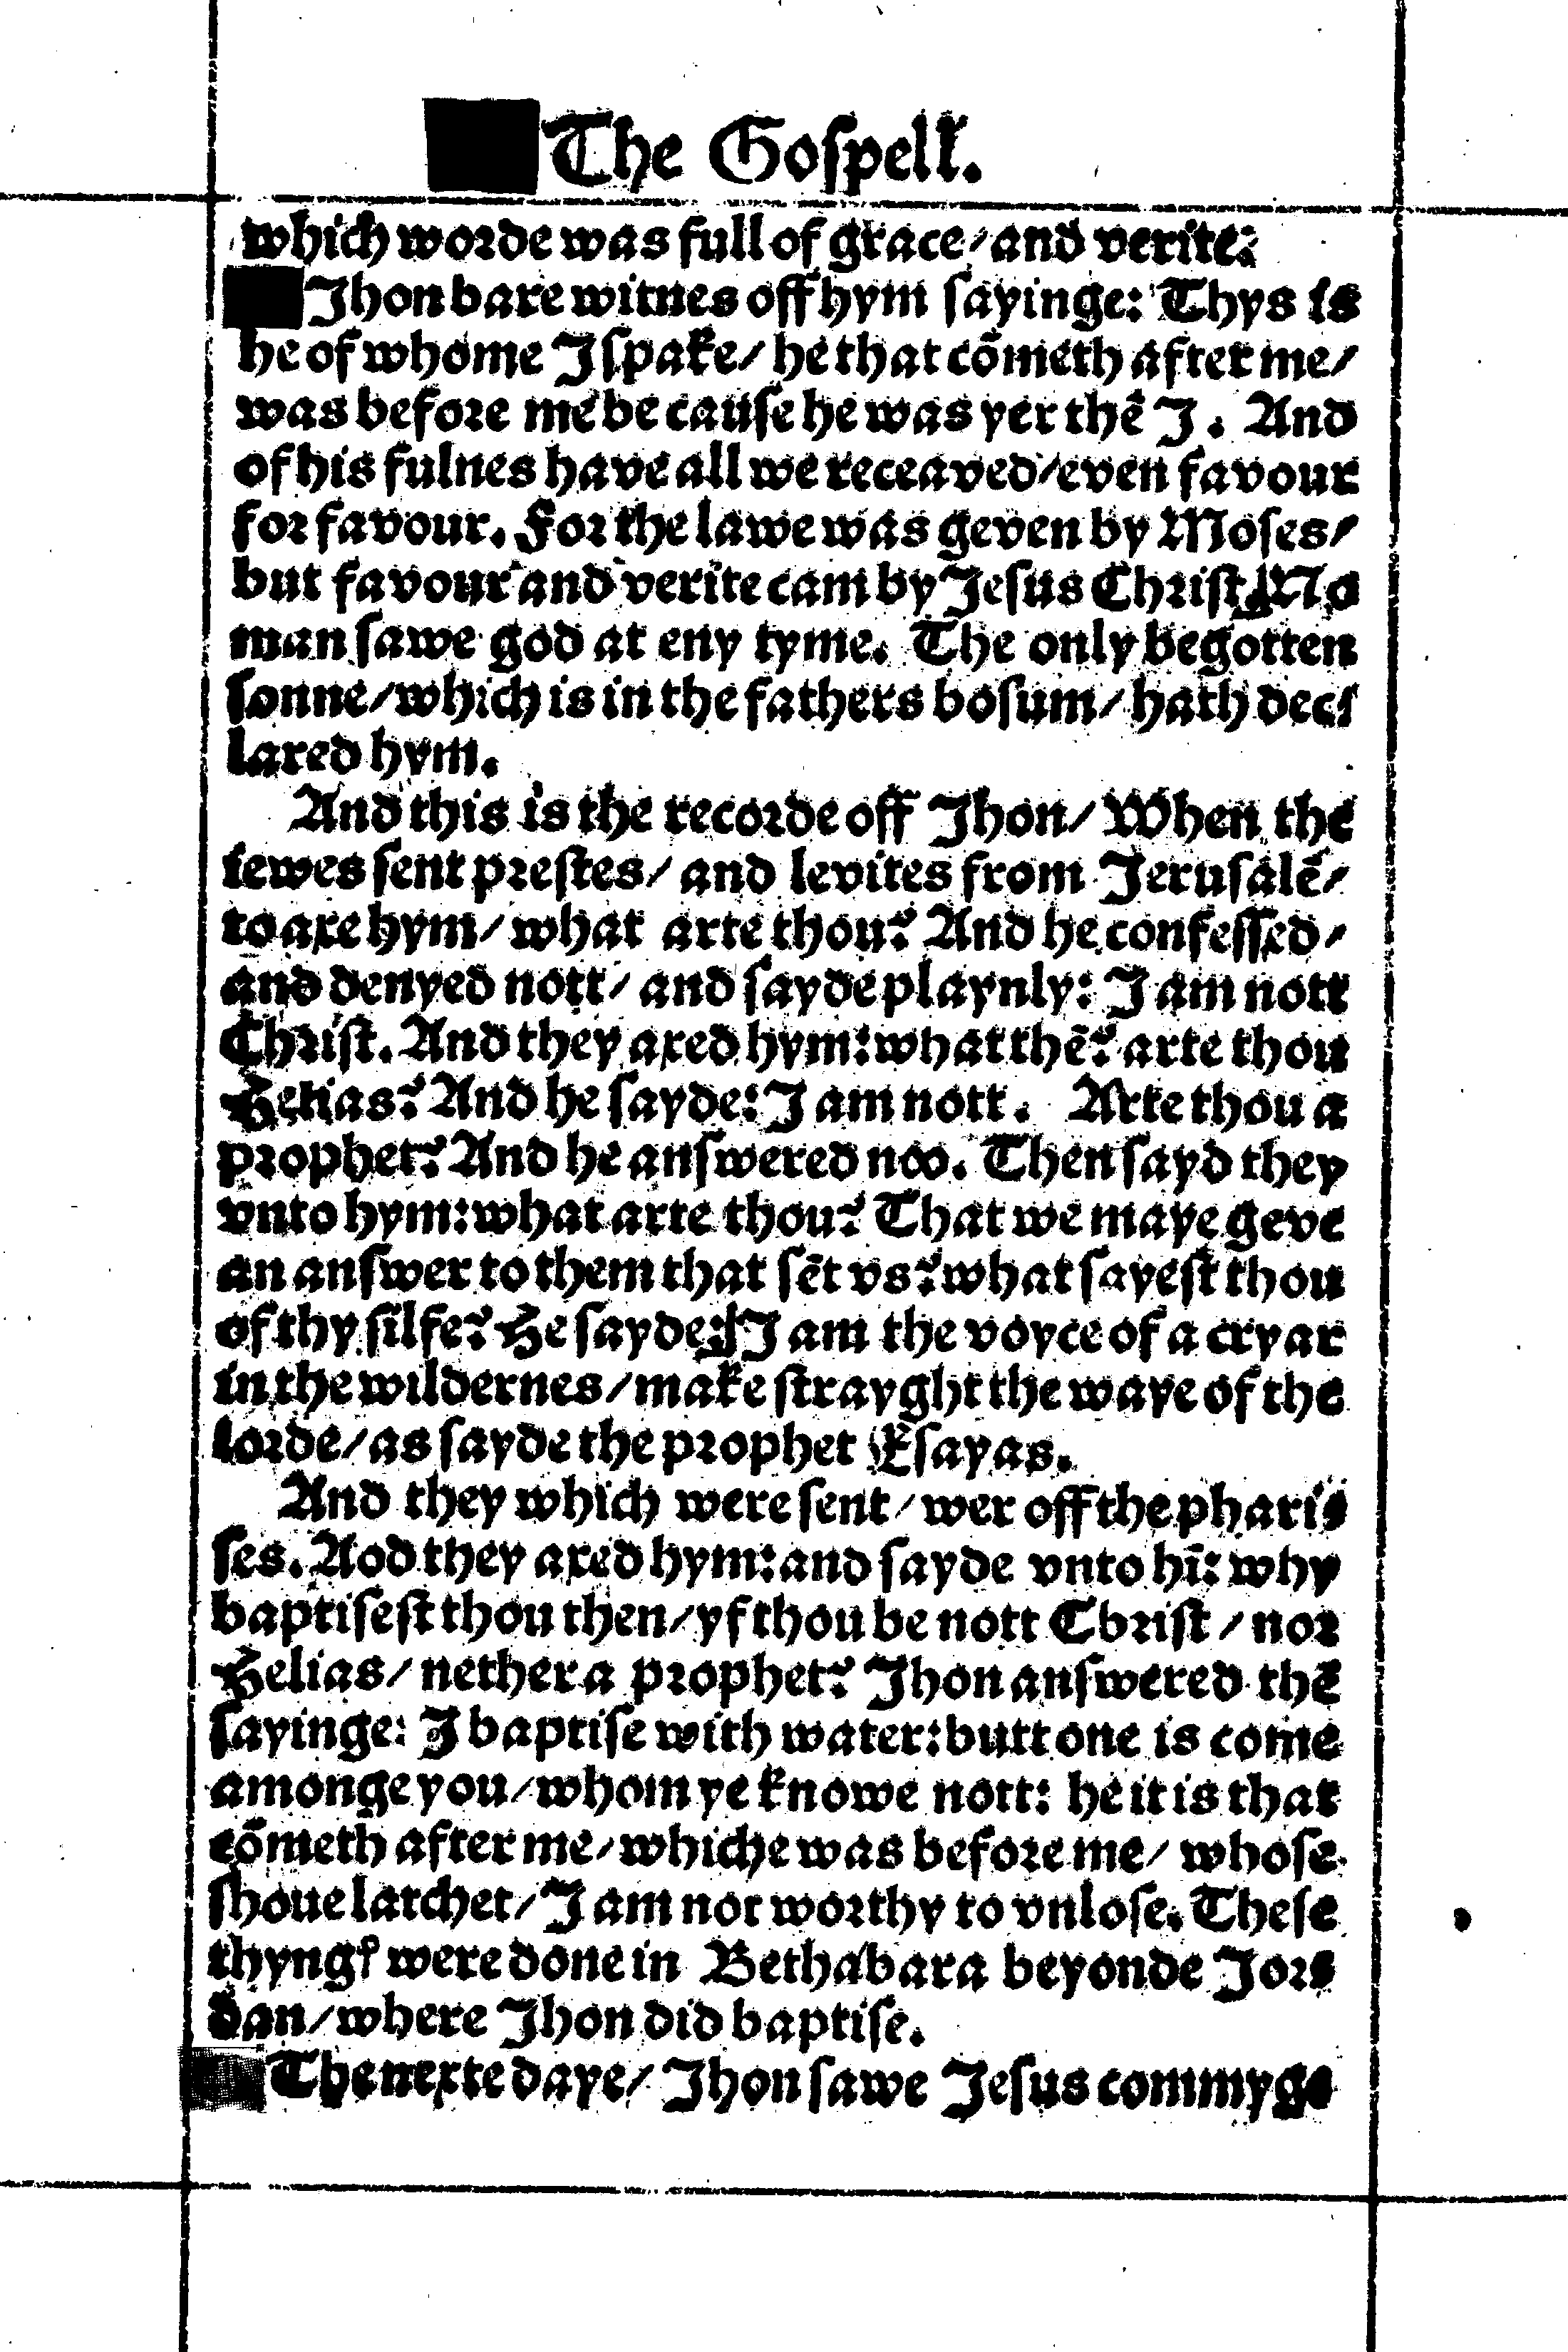

In [35]:
thresh, bw = cv2.threshold(adj, 127, 255, cv2.THRESH_BINARY)
Image.fromarray(bw)

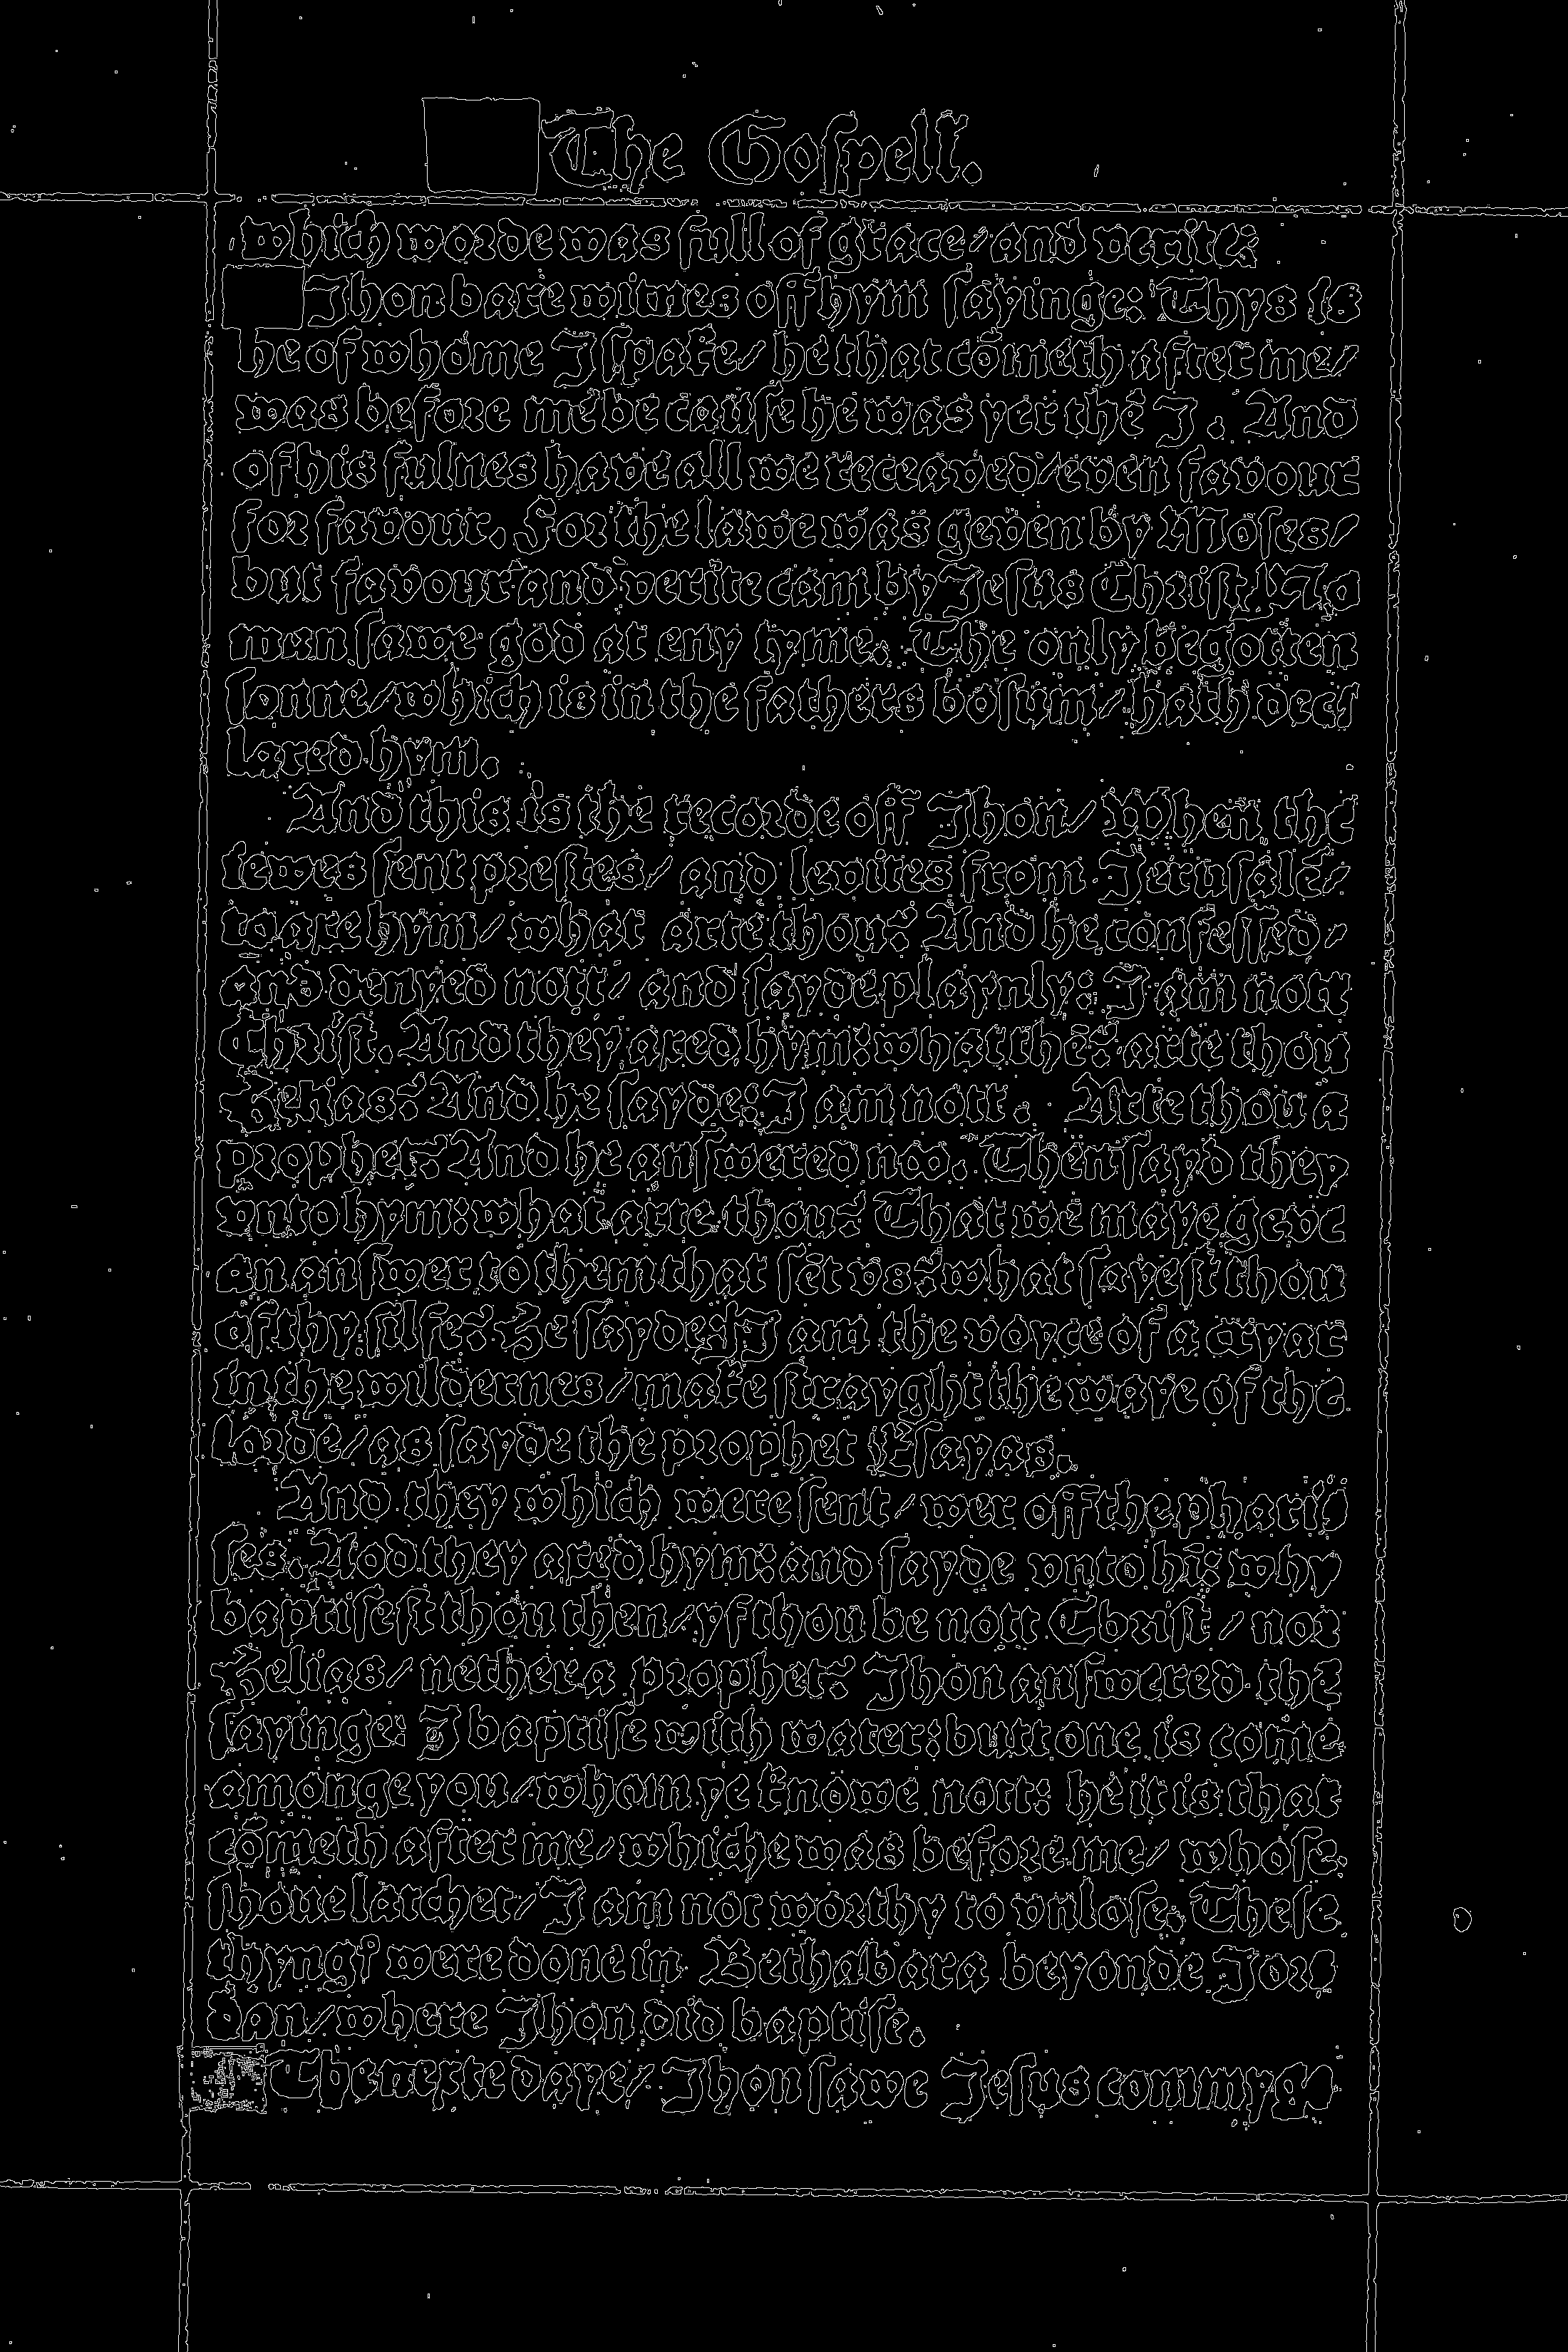

In [60]:
edges = cv2.Canny(bw, 100, 300, None, 7)
Image.fromarray(edges)

In [71]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 350, None, 0, 0)
len(lines)

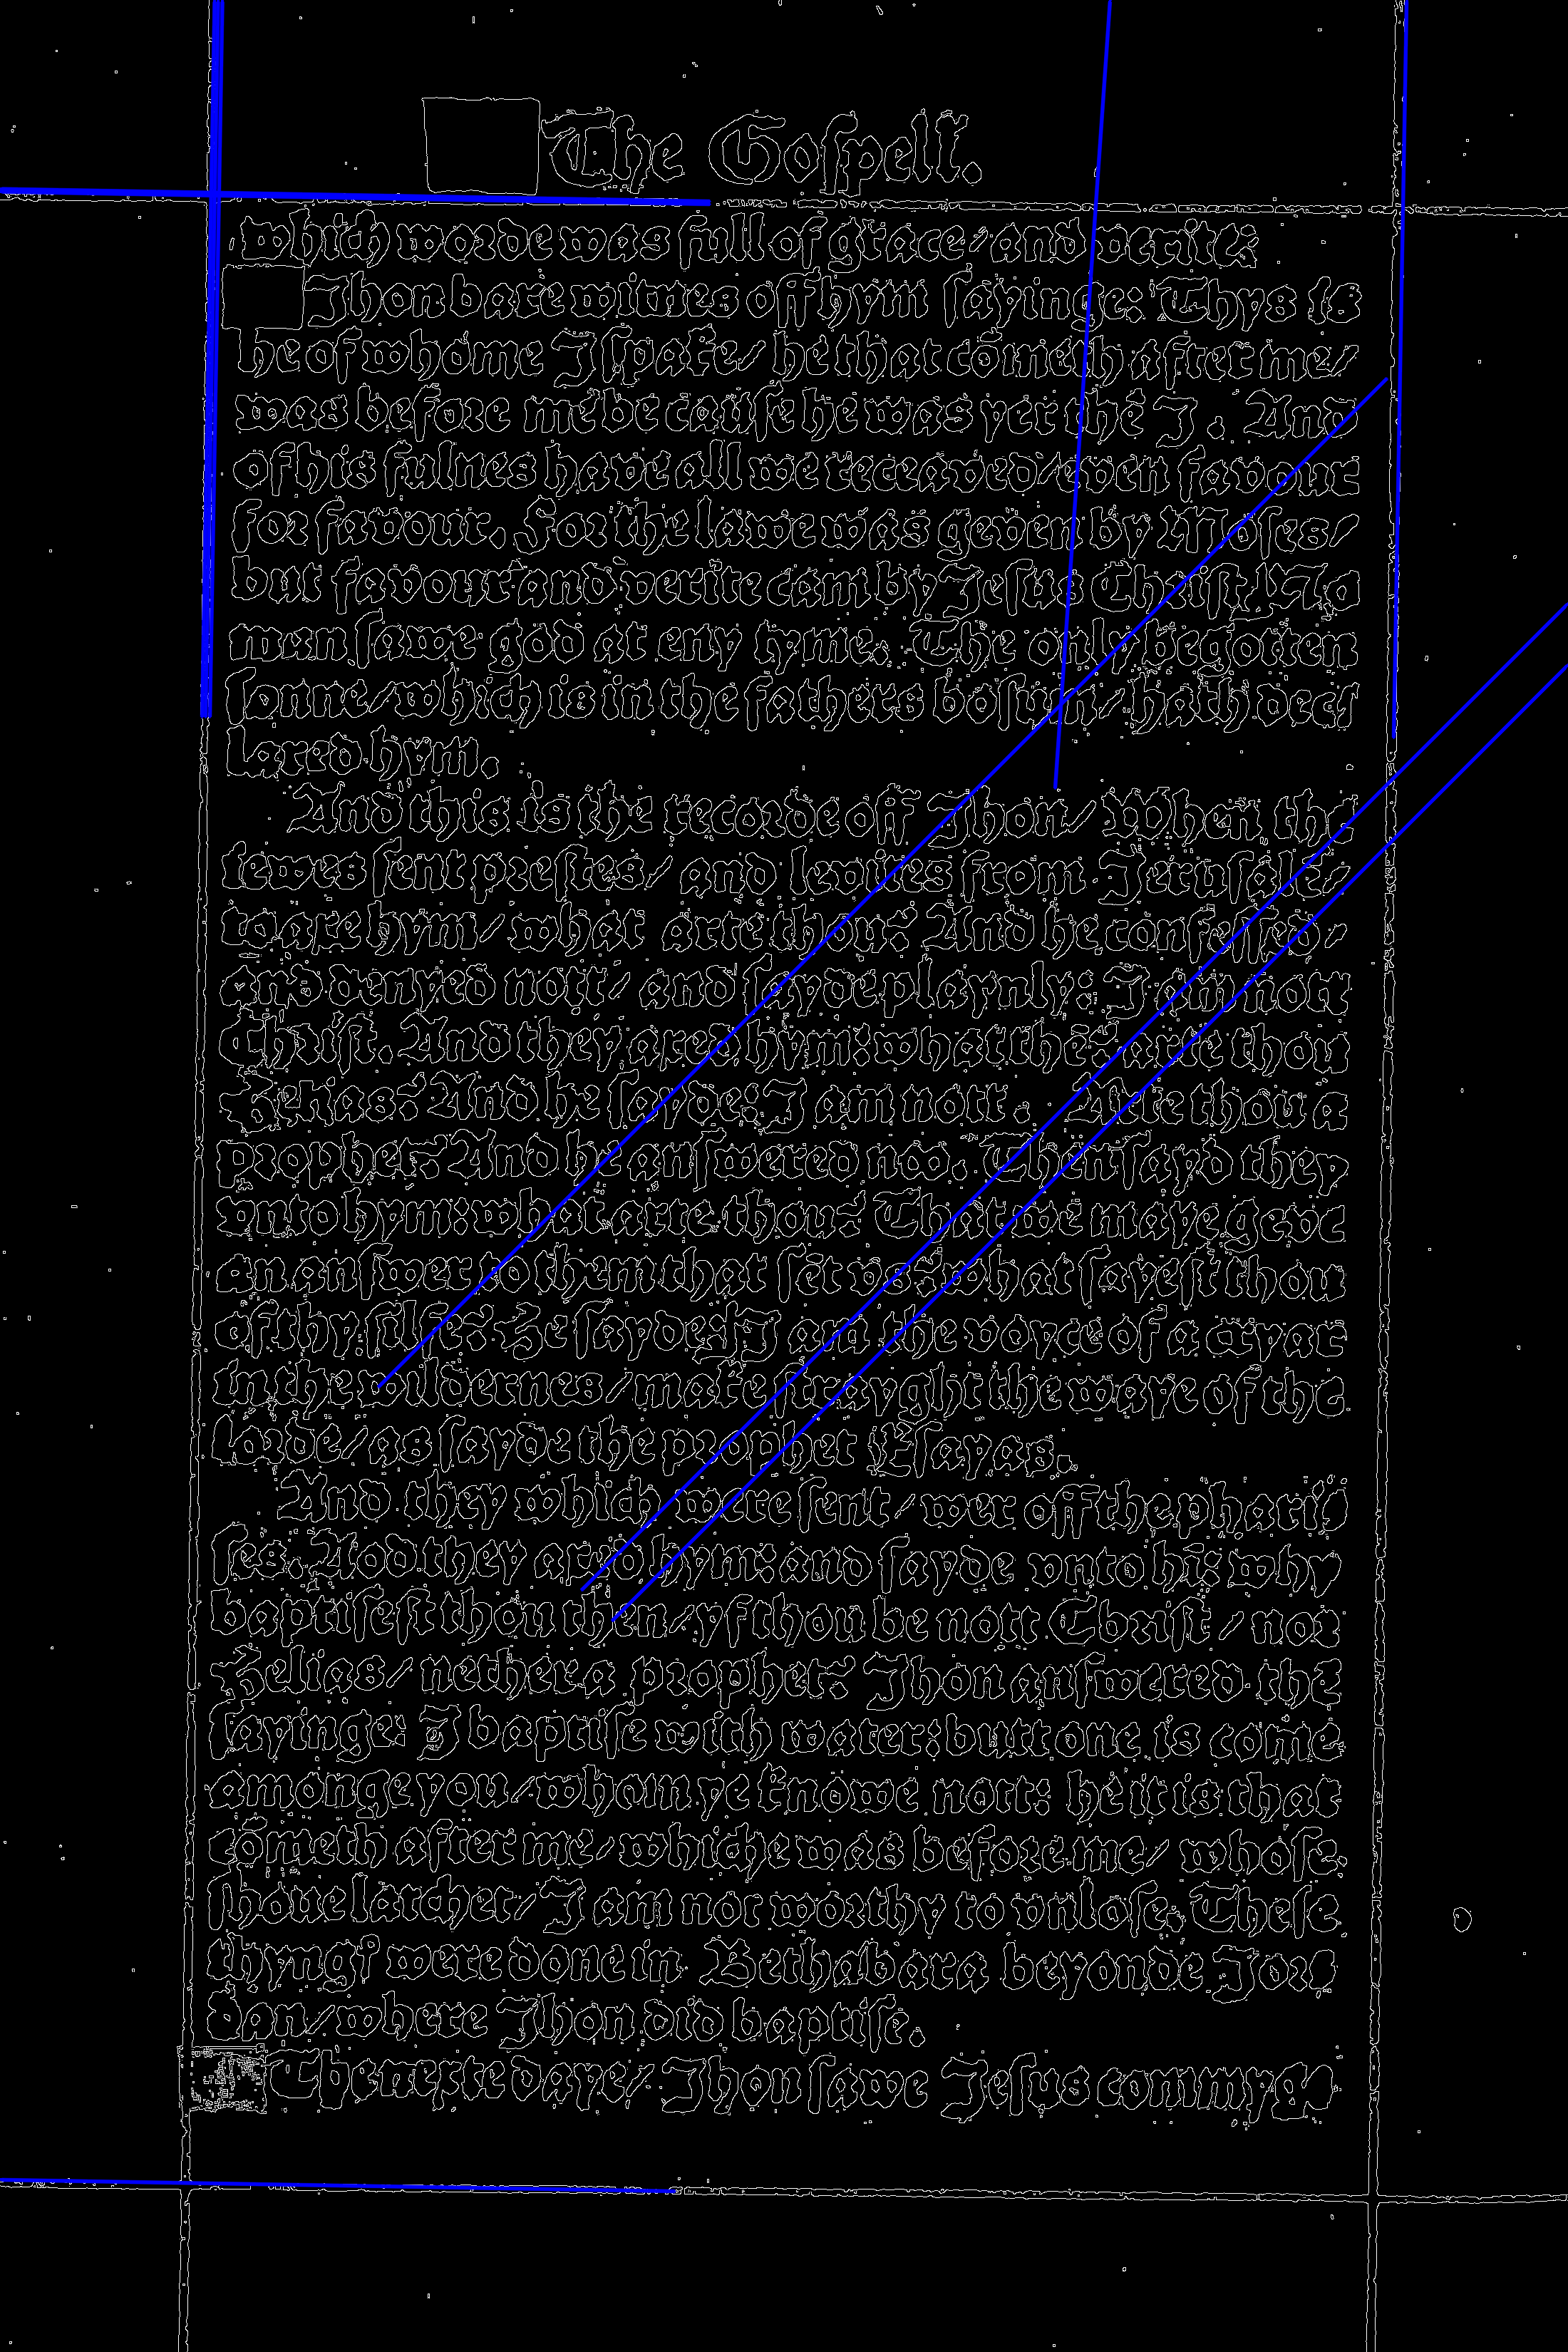

In [68]:
# Standard.
edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(edges_bgr, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
Image.fromarray(edges_bgr)

In [82]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 350, minLineLength=1000, maxLineGap=100)
len(lines)

11

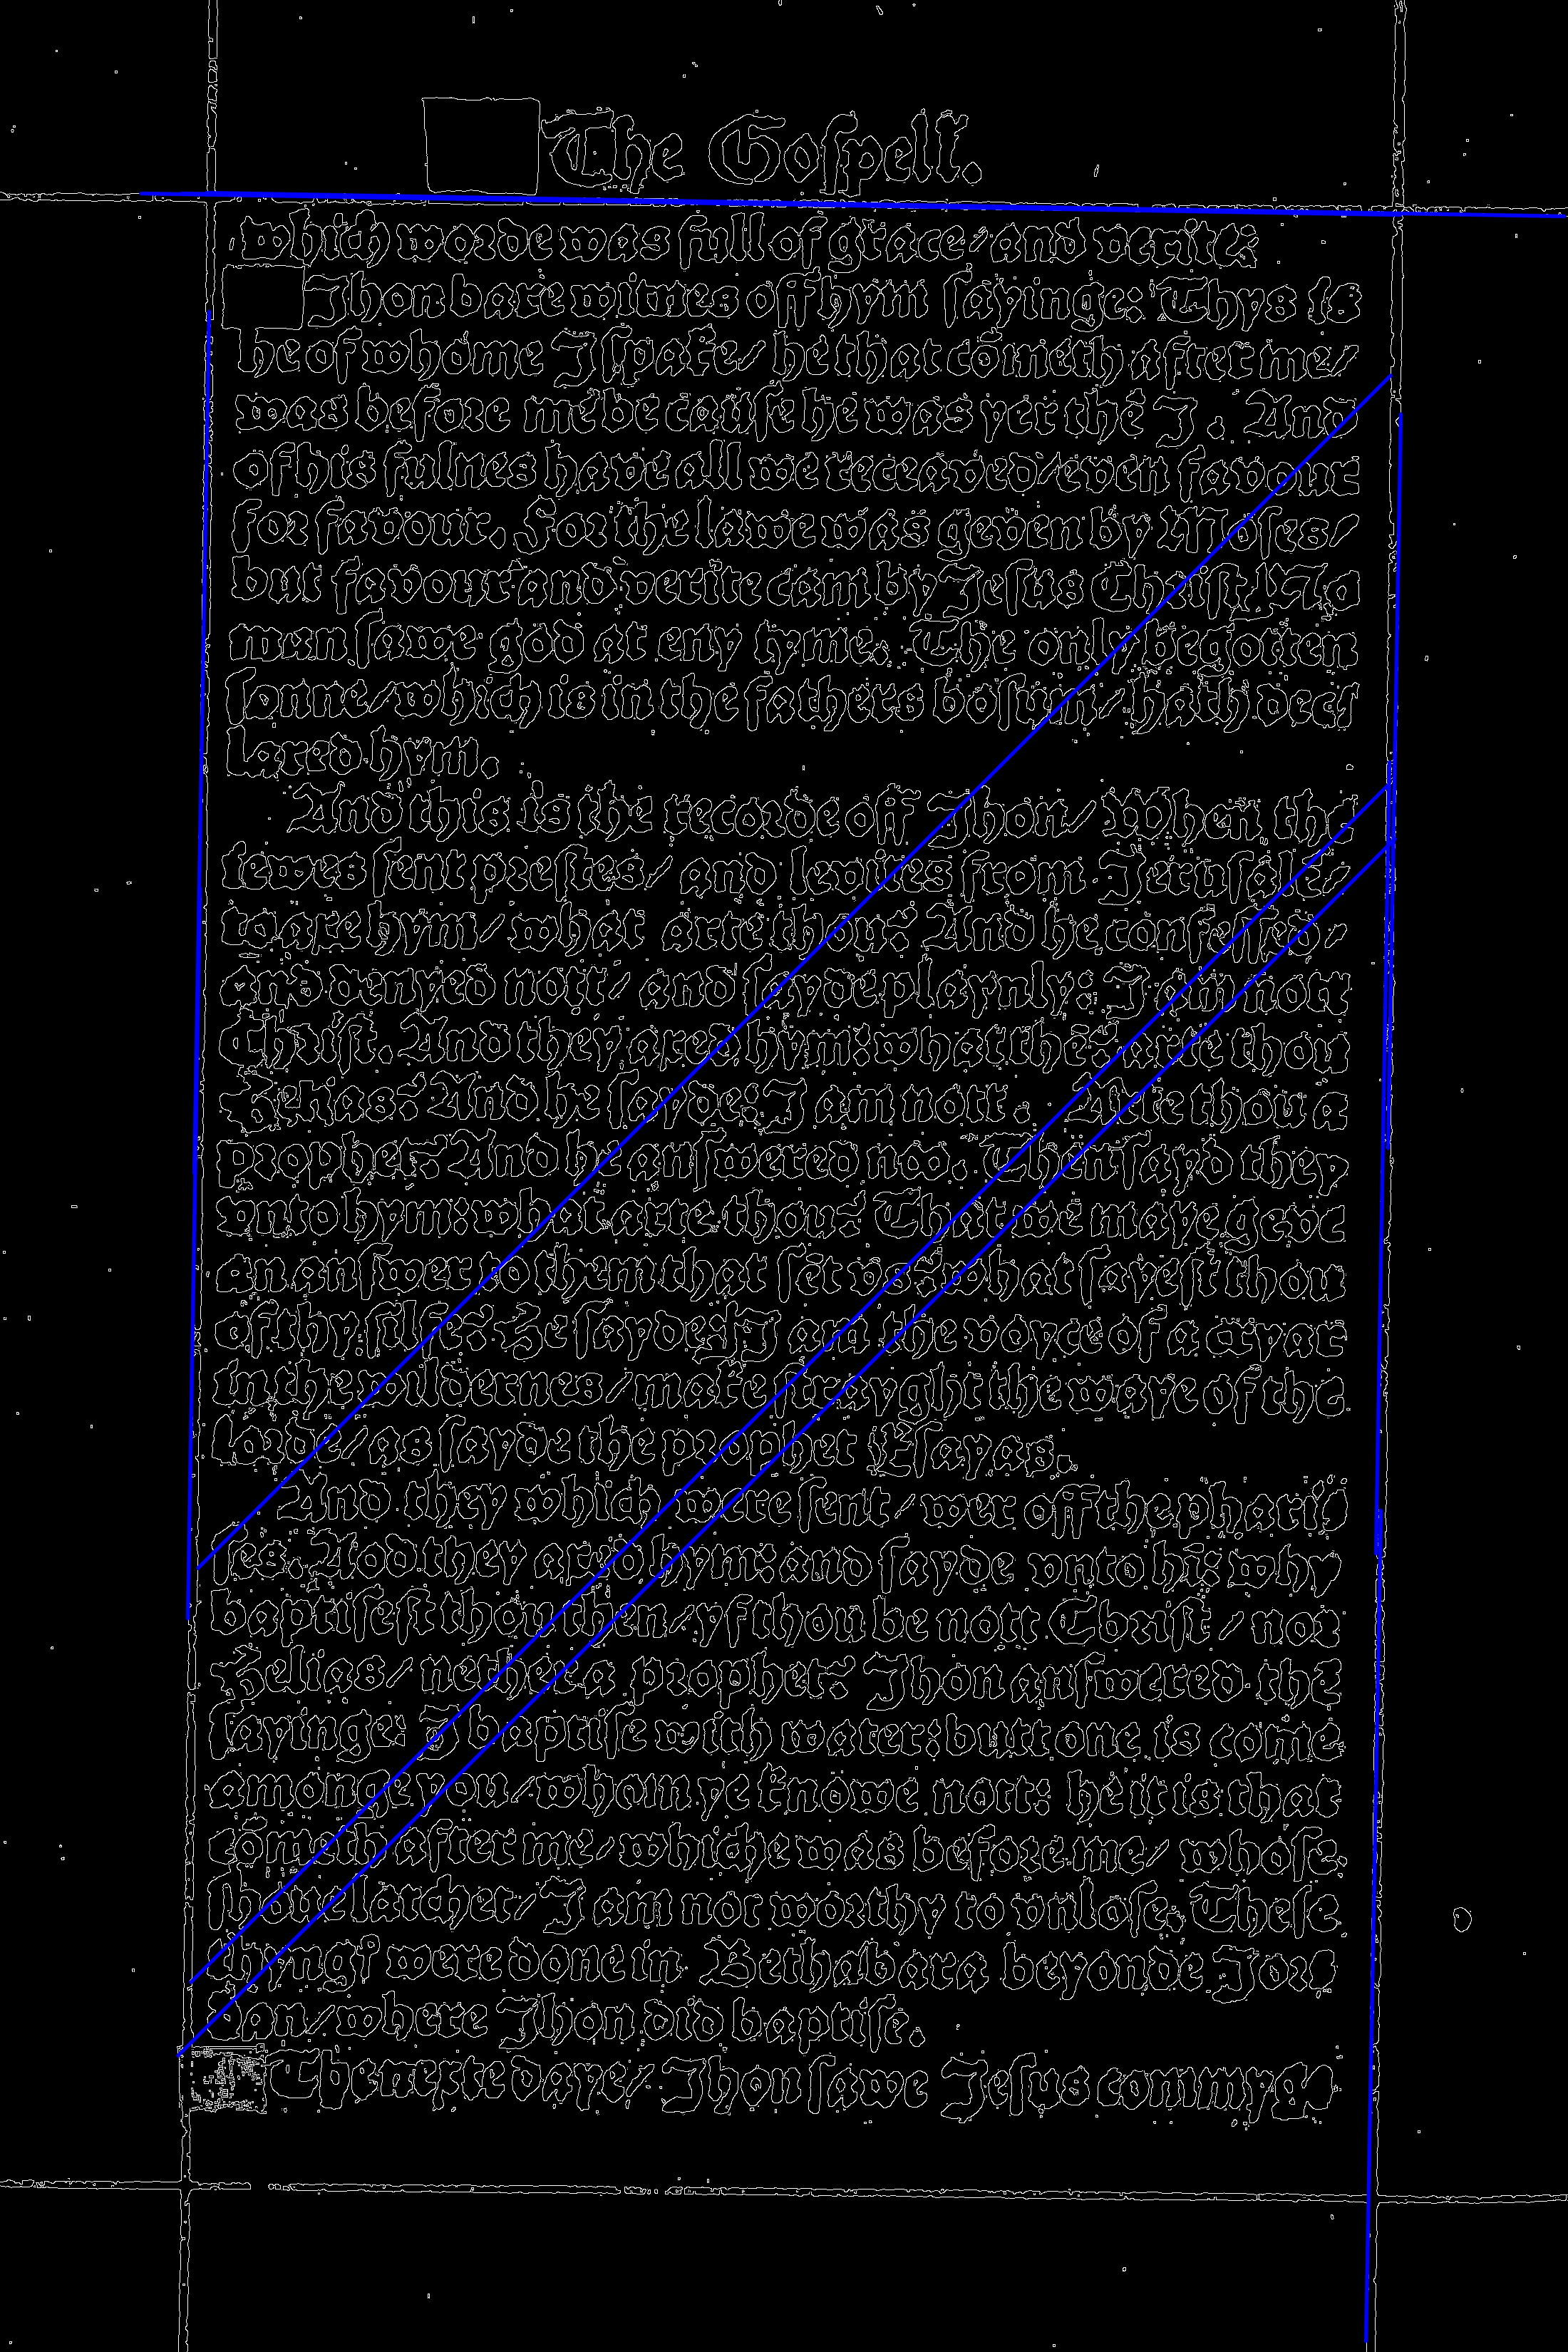

In [83]:
# Probabilistic.
edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
for i in range(0, len(lines)):
    x1, y1, x2, y2 = lines[i][0]
    pt1 = (x1, y1)
    pt2 = (x2, y2)
    cv2.line(edges_bgr, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
Image.fromarray(edges_bgr)